Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<u>**ACTIVITY NO. 6**</u> | <u>**Face Detection using OpenCV**</u>
**Name** | Castillo, Maria Antonette O.
**Section** | CPE32S8
**Date Performed**: | 02/20/2024
**Date Submitted**: | 02/20/2024
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to allow students to perform face detection on still images and videos using Haar cascades.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize OpenCV to detect faces in still images and videos.
* Demonstrate the use of Haar-like features for detection of other human features.

## 3. Procedures and Outputs

Contrary to initial assumptions, conducting face detection on a static image and a video stream shares a remarkable similarity. Essentially, the latter is merely a sequential rendition of the former: when detecting faces in videos, it essentially involves applying face detection to every individual frame obtained from the camera feed. Of course, video face detection introduces additional elements like tracking, which aren't relevant to static images. Nevertheless, it's valuable to recognize that the fundamental principles behind both processes remain consistent.

### Performing face detection on still image

The first and most basic way to perform face detection is to load an image and detect faces in it. To make the result visually meaningful, we will draw rectangles around faces on the original image.

**Before implementing the code below**, check the contents of the `cv2.CascadeClassifier()` function. Provide an explanation of the function, its parameters before running the code below.

In [3]:
# Make sure that for this activity, you have downloaded the
# file indicated below from the resource linked in the instructional materials
# in the module.

import cv2
# from google.colab.patches import cv2_imshow

picPath = r'C:\Users\maria\Downloads\breaking bad.jpg'
haarPath = r'C:\Users\maria\Downloads\haarcascade_frontalface_default.xml'

def faceDetect(picPath):
  face_cascade = cv2.CascadeClassifier(haarPath)

  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

  cv2.namedWindow('my image', cv2.WINDOW_NORMAL)  # Create a resizable window
  cv2.imshow('my image', img)
  cv2.resizeWindow('my image', 700, 600)  # Resize the window
  cv2.waitKey()
  cv2.destroyAllWindows()

In [4]:
faceDetect(picPath)

Output displayed:

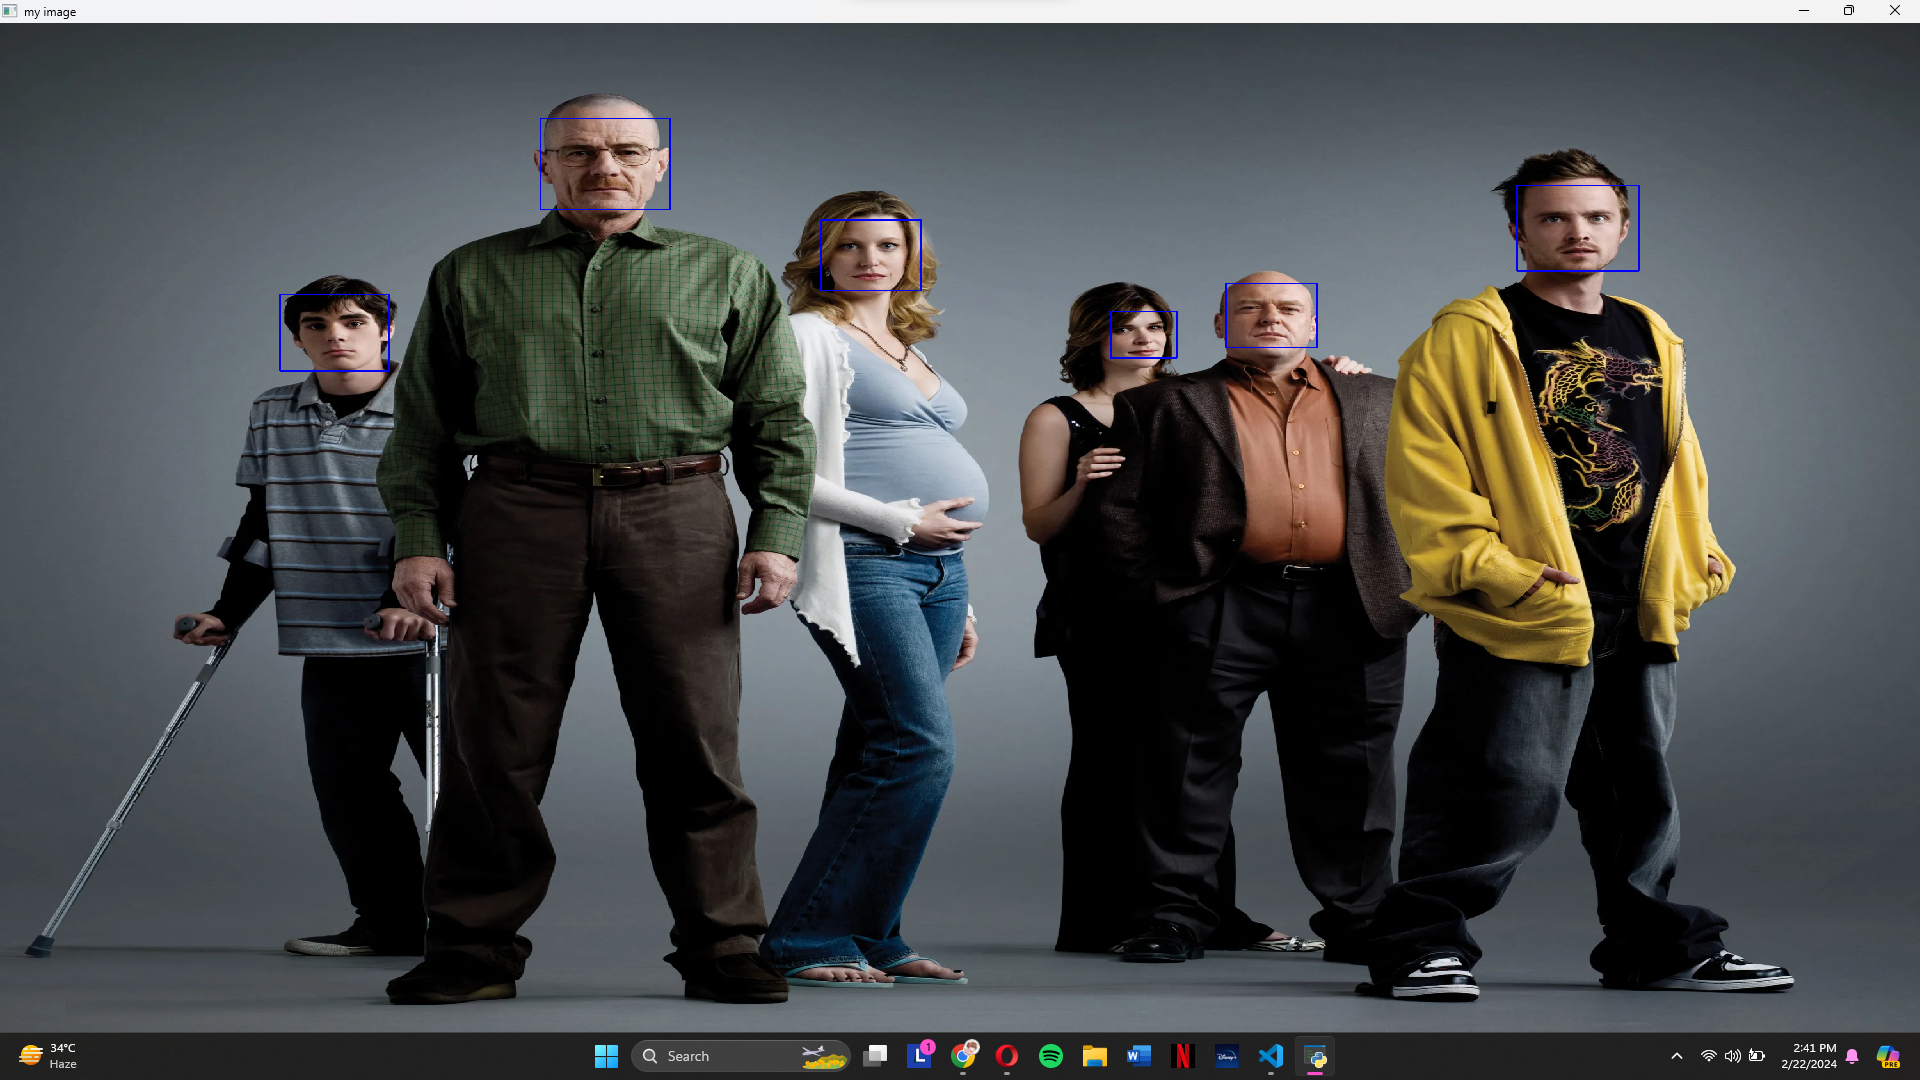

**Analysis**:
- Based on your earlier analysis, where do you think the face detection works in the line of code above?
- Provide an analysis of the parameters of the `detectMultiScale` method.
- Change the color of the border of the detected faces to red.
- Are you able to make the borders thicker? Demonstrate.

Face detection wqorks in this line: faces = face_cascade.detectMultiScale(gray, 1.3, 5)

detectMultiScale parameters:

- gray: Input grayscale image for face detection.

- scaleFactor = 1.3: Controls image scale reduction for multi-scale detection.

- minNeighbors = 5: Specifies the minimum number of neighbors for a detected area to be considered a face.

In [5]:
import cv2

def faceDetect(picPath):
    face_cascade = cv2.CascadeClassifier(haarPath)

    img = cv2.imread(picPath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 10)

    cv2.namedWindow('my image', cv2.WINDOW_NORMAL)  # Create a resizable window
    cv2.imshow('my image', img)
    cv2.resizeWindow('my image', 800, 600)  # Resize the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
faceDetect(picPath)

Output:
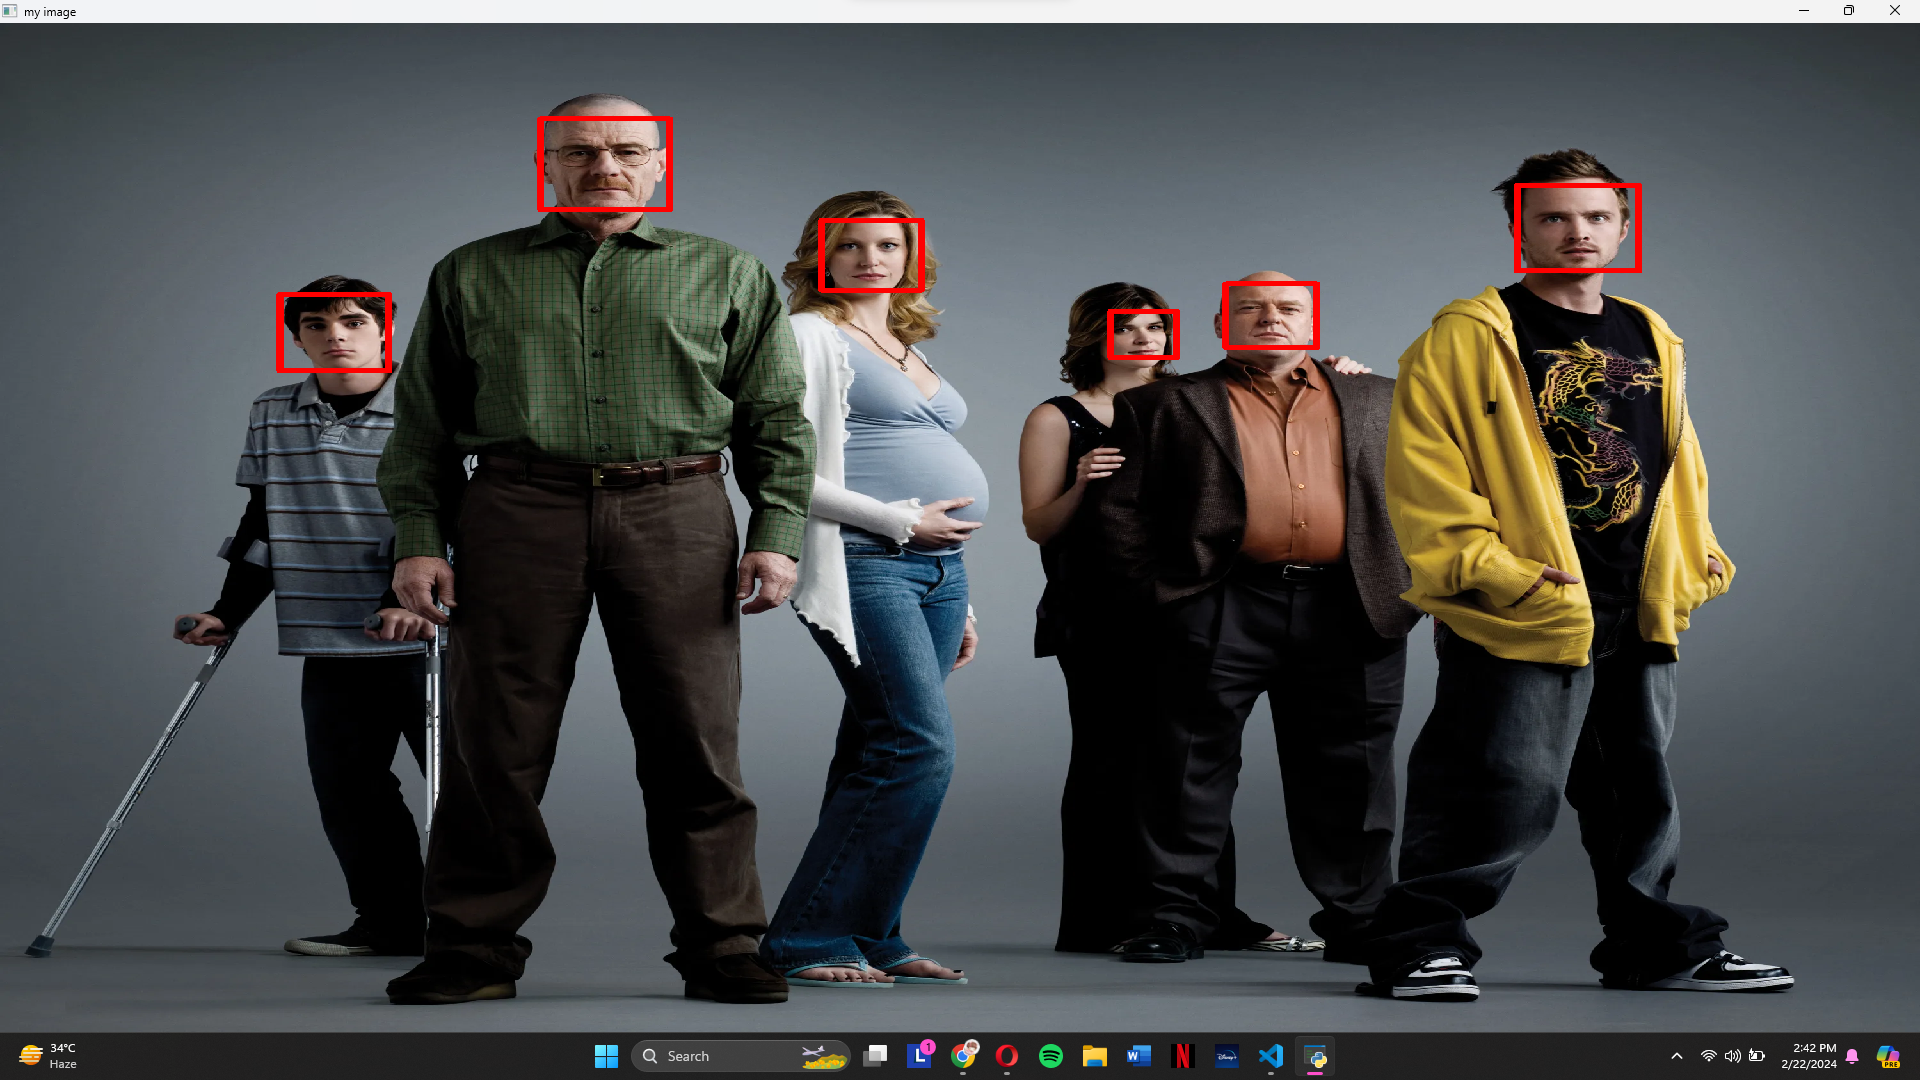

### Performing face detection on video

**Step 1**: Create a file called face_detection.py and include the following codes.

In [7]:
import cv2

**Step 2:** After this, we declare a method, `detect()`, which will perform face detection.

In [8]:
"""def detect():
  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)"""

"def detect():\n  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')\n  eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')\n  camera = cv2.VideoCapture(0)"

**Step 3:** The first thing we need to do inside the detect() method is to load the Haar cascade files so that OpenCV can operate face detection. As we copied
the cascade files in the local `cascades/` folder, we can use a relative path. Then, we open a VideoCapture object (the camera feed). The VideoCapture  constructor takes a parameter, which indicates the camera to be used; zero indicates the first camera available.

In [9]:
"""  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)"""

'  while (True):\n    ret, frame = camera.read()\n    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)'

**Step 4:** Next up, we capture a frame. The read() method returns two values: a Boolean indicating the success of the frame read operation, and the frame
itself. We capture the frame, and then we convert it to grayscale. This is a necessary operation, because face detection in OpenCV happens in the grayscale color space:

In [10]:
"""faces = face_cascade.detectMultiScale(gray, 1.3, 5)"""

'faces = face_cascade.detectMultiScale(gray, 1.3, 5)'

**Step 5:** Much like the single still image example, we call detectMultiScale on the grayscale version of the frame.

In [11]:
"""  for (x,y,w,h) in faces:
    img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,
    5, 0, (40,40))"""

'  for (x,y,w,h) in faces:\n    img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)\n    roi_gray = gray[y:y+h, x:x+w]\n    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,\n    5, 0, (40,40))'

**Step 6:** Here we have a further step compared to the still image example: we create a region of interest corresponding to the face rectangle, and within this rectangle, we operate "eye detection". This makes sense as you wouldn't want to go looking for eyes outside a face (well, for human beings at least!).

In [12]:
"""  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),
    (0,255,0),2)"""

'  for (ex,ey,ew,eh) in eyes:\n    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),\n    (0,255,0),2)'

**Step 7:** Again, we loop through the resulting eye tuples and draw green rectangles around them.

In [13]:
"""
    cv2.imshow("camera", frame)
    if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
detect()"""

'\n    cv2.imshow("camera", frame)\n    if cv2.waitKey(1000 / 12) & 0xff == ord("q"):\n      break\n\n  camera.release()\n  cv2.destroyAllWindows()\n\nif __name__ == "__main__":\ndetect()'

**Provide the following**:
- Screenshot of the output for the working code once you've put it all together.
- Summary of the steps you've performed along with observations.

In [14]:
import cv2
import os
import time

# Set the duration (in seconds) and the number of images to capture
duration = 10
num_images = 10

# Create a new directory to store the images
output_directory = "captured_images"
os.makedirs(output_directory, exist_ok=True)

# Open the camera
cap = cv2.VideoCapture(0)

# Set the frame width and height
cap.set(3, 640)
cap.set(4, 480)

# Start capturing images
start_time = time.time()

for i in range(num_images):
    # Read a frame from the camera
    ret, frame = cap.read()

    # Save the frame as an image file
    image_filename = os.path.join(output_directory, f"image_{i + 1}.jpg")
    cv2.imwrite(image_filename, frame)

    # Display the captured image (optional)
    cv2.imshow('Captured Image', frame)
    cv2.waitKey(1)

    # Check if the specified duration has elapsed
    if time.time() - start_time > duration:
        break

# Release the camera
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

print(f"{num_images} images captured in {duration} seconds. Images are saved in '{output_directory}'.")

10 images captured in 10 seconds. Images are saved in 'captured_images'.


In [15]:
import cv2
def detect():
    
    face_cascade = cv2.CascadeClassifier(r'C:\Users\maria\Downloads\haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(r'C:\Users\maria\Downloads\haarcascade_eye.xml')
    camera = cv2.VideoCapture(0)

    while (True):
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x,y,w,h) in faces:
            img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,
                5, 0, (40,40))

            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),
                (0,255,0),2)

        
        cv2.imshow("camera", frame)
        if cv2.waitKey(1000 // 12) & 0xff == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect()

## 4. Supplementary Activity

In your Cameo project, include real-time face detection using Haar cascade. Show screenshots of the working demonstration for this supplementary activity.

Additionally, implement similar steps to detect a smile using Haar cascades.

## 5. Summary, Conclusions and Lessons Learned

#### **In this activity, I was able to detect faces using OpenCV's Haar cascades. I learned the detectMultiScale method and its parameters. Moreover, I implemented the face detection on both images and live video. I also modified the code to change the color of detected face border, and adjust its thickness for better visualization.**

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*